### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
facturacion_total = {
    "Tienda": tienda["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}
print("Facturación total por tienda:\n", facturacion_total)



Facturación total por tienda:
 {'Tienda': np.float64(1150880400.0), 'Tienda 2': np.float64(1116343500.0), 'Tienda 3': np.float64(1098019600.0), 'Tienda 4': np.float64(1038375700.0)}


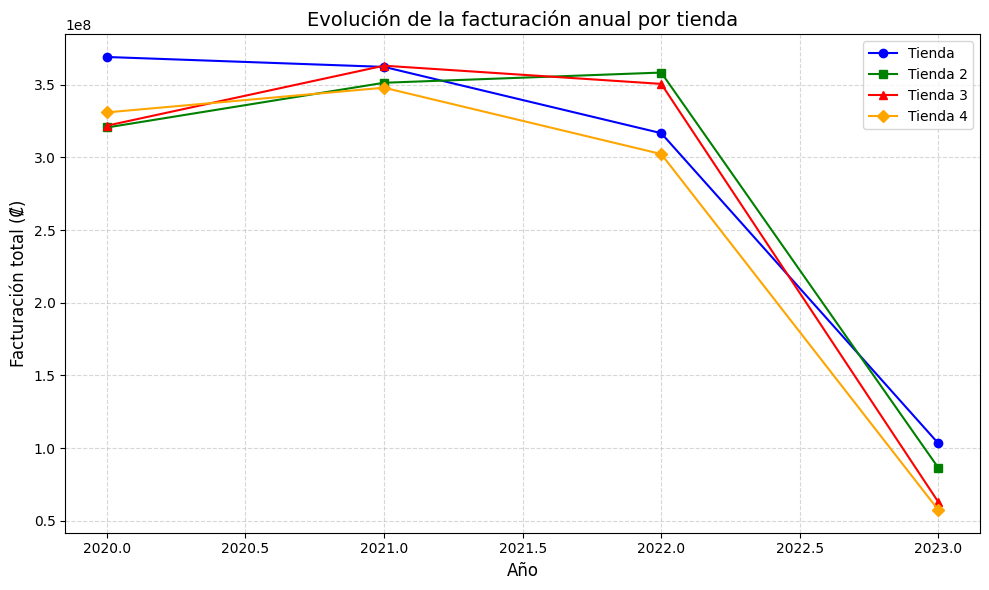

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

facturacion_t1 = tienda.groupby(tienda["Fecha de Compra"].dt.year)["Precio"].sum()
facturacion_t2 = tienda2.groupby(tienda2["Fecha de Compra"].dt.year)["Precio"].sum()
facturacion_t3 = tienda3.groupby(tienda3["Fecha de Compra"].dt.year)["Precio"].sum()
facturacion_t4 = tienda4.groupby(tienda4["Fecha de Compra"].dt.year)["Precio"].sum()


años = facturacion_t1.index

plt.figure(figsize=(10, 6))
plt.plot(años, facturacion_t.values, marker='o', label='Tienda ', color='blue')
plt.plot(años, facturacion_t2.values, marker='s', label='Tienda 2', color='green')
plt.plot(años, facturacion_t3.values, marker='^', label='Tienda 3', color='red')
plt.plot(años, facturacion_t4.values, marker='D', label='Tienda 4', color='orange')

plt.title("Evolución de la facturación anual por tienda", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Facturación total (₡)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [ ]:
categorias_populares = {
    "Tienda": tienda["Categoría del Producto"].value_counts(),
    "Tienda 2": tienda2["Categoría del Producto"].value_counts(),
    "Tienda 3": tienda3["Categoría del Producto"].value_counts(),
    "Tienda 4": tienda4["Categoría del Producto"].value_counts()
}
print("Categorías populares por tienda:\n", categorias_populares)


Categorías populares por tienda:
 {'Tienda': Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64, 'Tienda 2': Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64, 'Tienda 3': Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64, 'Tienda 4': Categoría del Producto
Mu

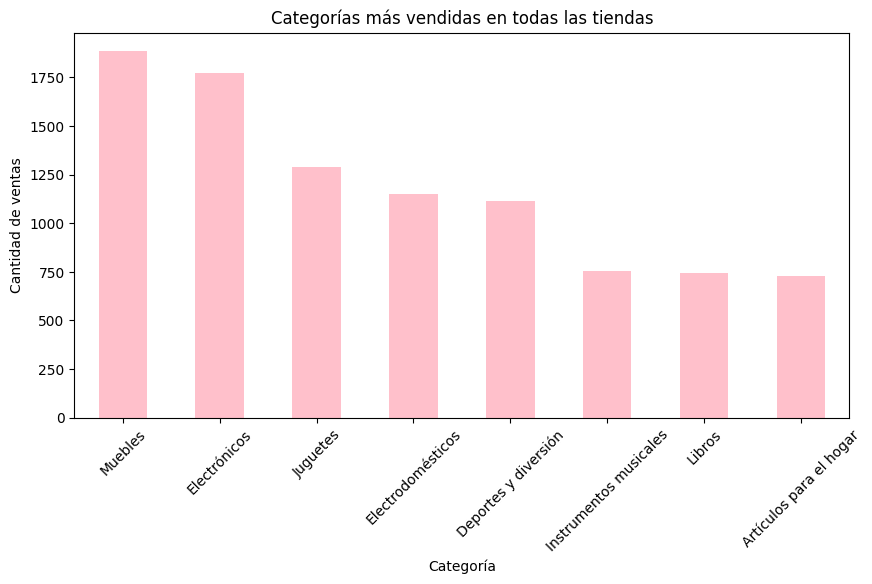

In [ ]:

categorias_totales = pd.concat([tienda["Categoría del Producto"],
                                tienda2["Categoría del Producto"],
                                tienda3["Categoría del Producto"],
                                tienda4["Categoría del Producto"]]).value_counts()

plt.figure(figsize=(10,5))
categorias_totales.plot(kind="bar", color="pink")
plt.title("Categorías más vendidas en todas las tiendas")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.show()



# 3. Calificación promedio de la tienda


In [ ]:
calificacion_promedio = {
    "Tienda": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

print("Calificación promedio por tienda:\n", calificacion_promedio)



Calificación promedio por tienda:
 {'Tienda': np.float64(3.976685036032217), 'Tienda 2': np.float64(4.037303942348453), 'Tienda 3': np.float64(4.048325561678677), 'Tienda 4': np.float64(3.9957591178965224)}


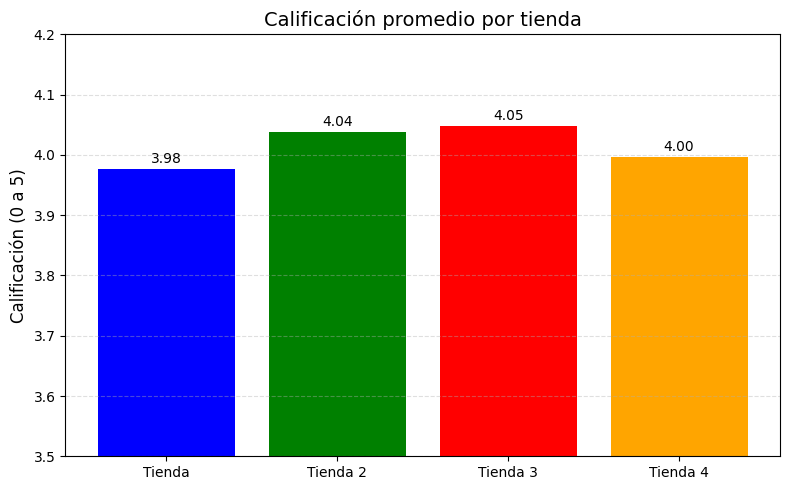

In [ ]:
import matplotlib.pyplot as plt

tiendas = list(calificacion_promedio.keys())
calificaciones = list(calificacion_promedio.values())

plt.figure(figsize=(8, 5))
plt.bar(tiendas, calificaciones, color=["blue", "green", "red", "orange"])

for i, valor in enumerate(calificaciones):
    plt.text(i, valor + 0.01, f"{valor:.2f}", ha='center', fontsize=10)

plt.title("Calificación promedio por tienda", fontsize=14)
plt.ylabel("Calificación (0 a 5)", fontsize=12)
plt.ylim(3.5, 4.2)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



# 4. Productos más y menos vendidos

In [ ]:
productos_vendidos = {
    "Tienda": tienda["Producto"].value_counts(),
    "Tienda 2": tienda2["Producto"].value_counts(),
    "Tienda 3": tienda3["Producto"].value_counts(),
    "Tienda 4": tienda4["Producto"].value_counts()
}
print("Productos más y menos vendidos por tienda:\n", productos_vendidos)


Productos más y menos vendidos por tienda:
 {'Tienda': Producto
Microondas                     60
TV LED UHD 4K                  60
Armario                        60
Secadora de ropa               58
Mesa de noche                  56
Bloques de construcción        56
Balón de baloncesto            55
Bicicleta                      54
Vaso térmico                   54
Refrigerador                   54
Impresora                      54
Batería                        53
Cubertería                     52
Carrito de control remoto      52
Modelado predictivo            51
Auriculares                    50
Ajedrez de madera              49
Iphone 15                      49
Lavavajillas                   48
Lavadora de ropa               47
Guitarra eléctrica             47
Guitarra acústica              46
Sofá reclinable                46
Silla de oficina               46
Estufa                         45
Cama box                       44
Kit de bancas                  44
Smart TV          

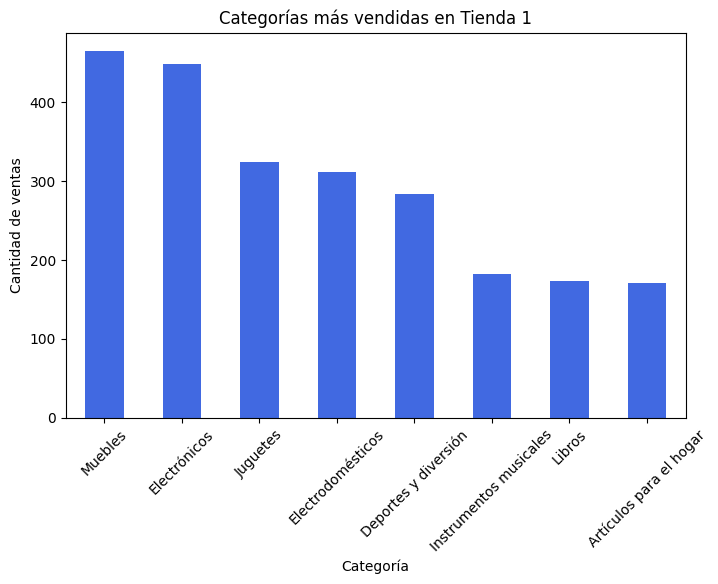

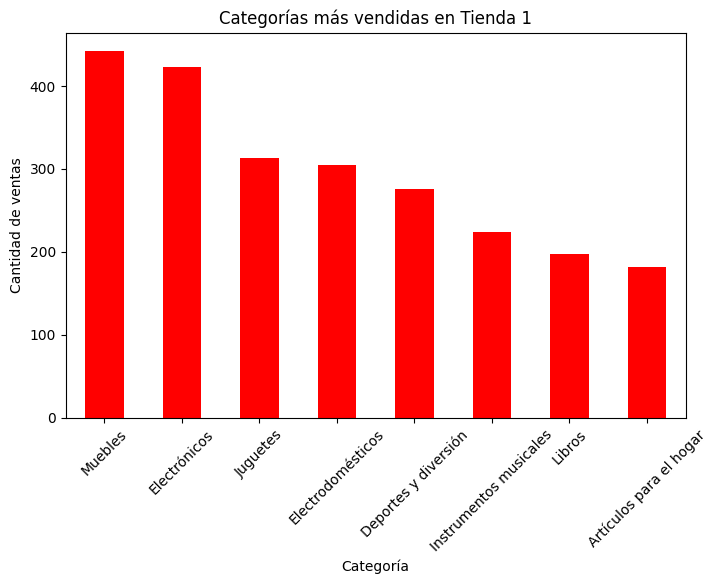

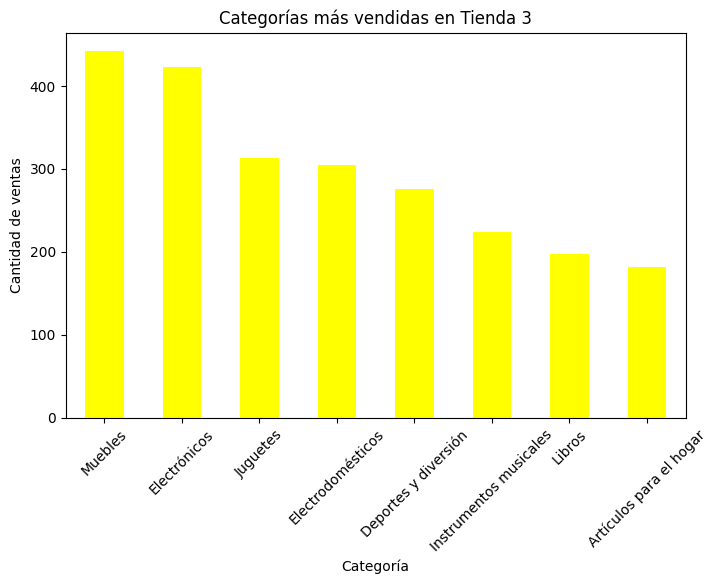

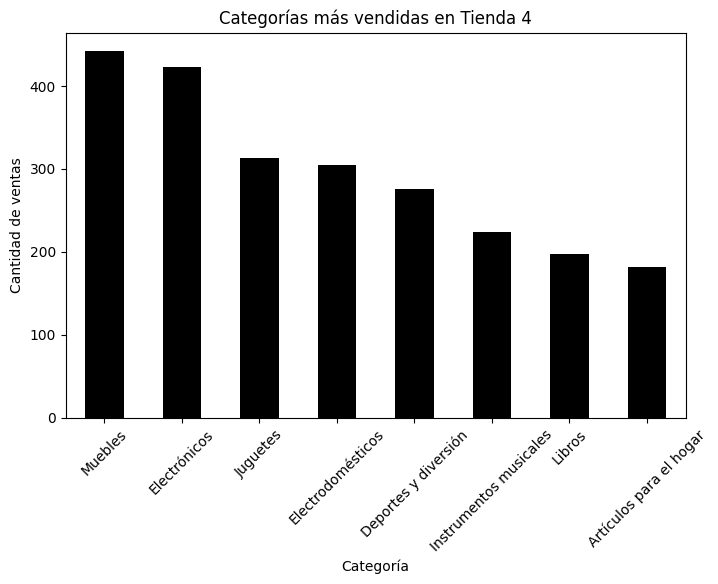

In [ ]:
import matplotlib.pyplot as plt


categorias_tienda = tienda["Categoría del Producto"].value_counts()


plt.figure(figsize=(8,5))
categorias_tienda.plot(kind="bar", color="royalblue")
plt.title("Categorías más vendidas en Tienda 1")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.show()

categorias_tienda = tienda["Categoría del Producto"].value_counts()

categorias_tienda2 = tienda2["Categoría del Producto"].value_counts()

plt.figure(figsize=(8,5))
categorias_tienda2.plot(kind="bar", color="red")
plt.title("Categorías más vendidas en Tienda 1")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.show()

categorias_tienda3 = tienda2["Categoría del Producto"].value_counts()


plt.figure(figsize=(8,5))
categorias_tienda3.plot(kind="bar", color="yellow")
plt.title("Categorías más vendidas en Tienda 3")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.show()


categorias_tienda4 = tienda2["Categoría del Producto"].value_counts()


plt.figure(figsize=(8,5))
categorias_tienda4.plot(kind="bar", color="black")
plt.title("Categorías más vendidas en Tienda 4")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.show()


# 5. Envío promedio por tienda

In [ ]:
costo_envio_promedio = {
    "Tienda": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}
print("Costo promedio de envío por tienda:\n", costo_envio_promedio)


Costo promedio de envío por tienda:
 {'Tienda': np.float64(26018.60958033065), 'Tienda 2': np.float64(25216.235693090293), 'Tienda 3': np.float64(24805.680373039424), 'Tienda 4': np.float64(23459.457167090754)}


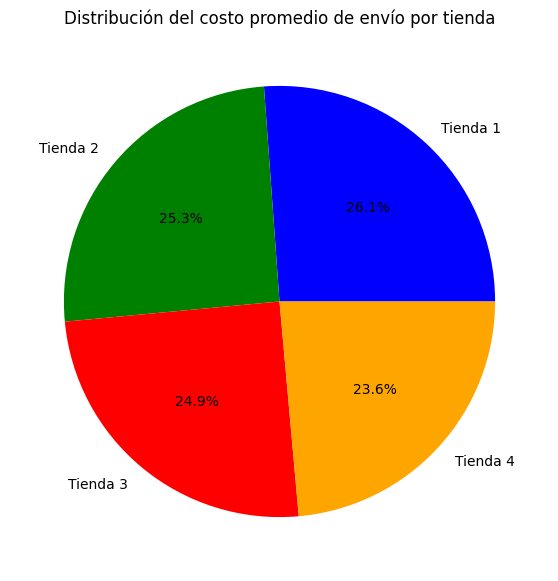

In [ ]:
import matplotlib.pyplot as plt

costo_envio = {
    "Tienda 1": 26018.61,
    "Tienda 2": 25216.24,
    "Tienda 3": 24805.68,
    "Tienda 4": 23459.46
}

plt.figure(figsize=(7,7))
plt.pie(costo_envio.values(), labels=costo_envio.keys(), autopct="%1.1f%%", colors=["blue", "green", "red", "orange"])
plt.title("Distribución del costo promedio de envío por tienda")
plt.show()


# Informe final

El propósito de este análisis es brindar al Sr. Juan una recomendación fundamentada sobre qué tienda de la cadena debería vender para emprender un nuevo proyecto en un mercado diferente. La sugerencia se basa en cinco indicadores clave.

Tras revisar los datos, se recomienda vender la Tienda 4, ya que presenta el desempeño general más débil. Es la tienda con menor facturación anual, además de tener la segunda calificación promedio más baja, lo que podría reflejar una menor satisfacción del cliente. Si bien su costo promedio de envío es el más bajo, este aspecto no compensa los otros resultados menos favorables.

En cuanto a la diversidad de productos, se mantiene similar a las demás tiendas; sin embargo, muchos de sus artículos apenas alcanzan entre 33 y 39 unidades vendidas, lo que indica menor rotación de produtos. Por último, su desempeño en cuanto a la popularidad por categoría es comparable al de otras tiendas, por lo que tampoco ofrece una ventaja competitiva en este aspecto.

##Conclusión

**La Tienda 4** presenta el desempeño más débil en términos generales.

Aunque tiene el costo de envío más bajo, sus ingresos son los más bajos, su calificación promedio está por debajo de la media y muchos de sus productos apenas alcanzan volúmenes mínimos de venta. Por ende, se sugiere considerar la venta de esta tienda y así liberar recursos para nuevas oportunidades de negocio.
